# **Part I: Applying Image Processing Filters For Image Cartoonifying**

# **Images Cartoonifier**

In [1]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

**Loading the image**

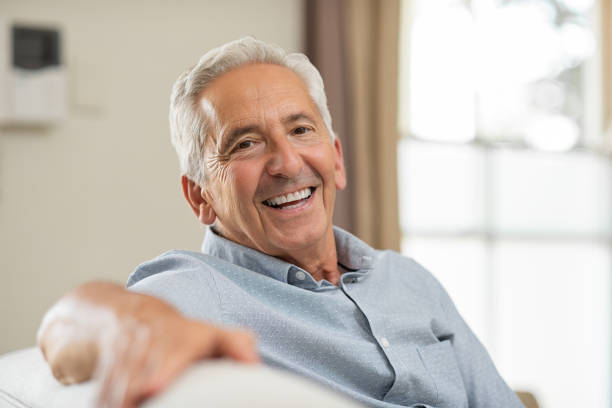

In [32]:
original_image = cv2.imread("/content/OldMan3.jpg")
cv2_imshow(original_image)

**Converting RGB Image to Grayscale**

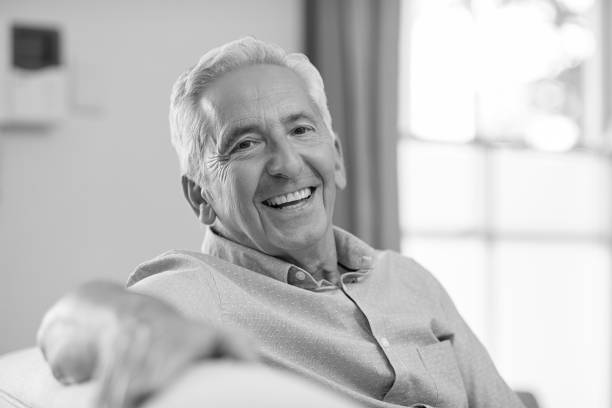

In [33]:
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_image)

**Noise Reduction Using Median Filter**

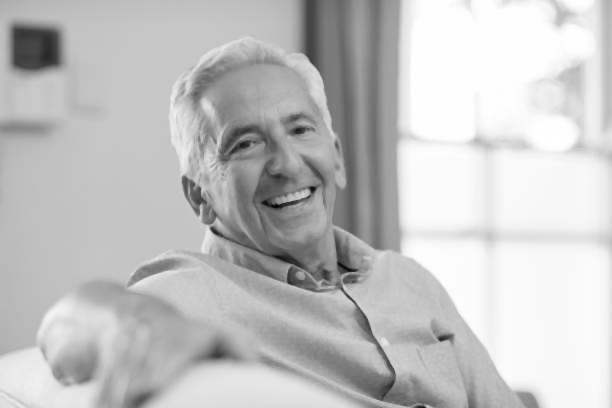

In [34]:
median_filter_image = cv2.medianBlur(grayscale_image, 3)
cv2_imshow(median_filter_image)


**Edge Detection Using Laplacian Filter**

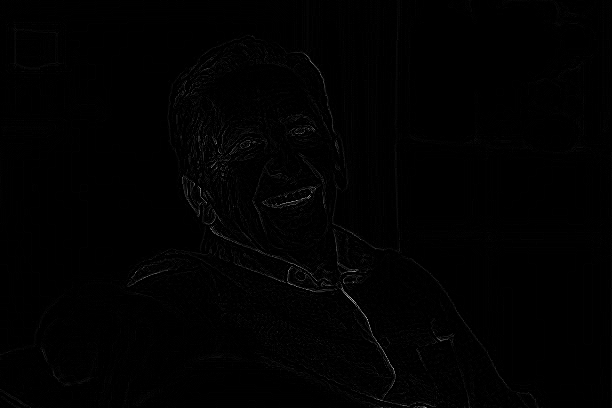

In [35]:
laplacian_image = cv2.Laplacian(median_filter_image, cv2.CV_64F)
cv2_imshow(laplacian_image)

**Edges Thresholding**

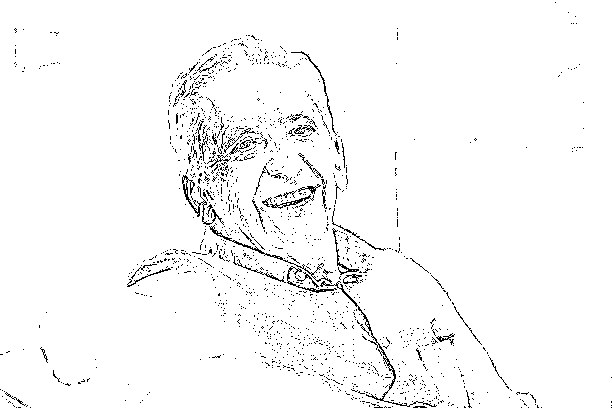

In [48]:
th, black_edges_image = cv2.threshold(laplacian_image, 10,255, cv2.THRESH_BINARY_INV)
cv2_imshow(black_edges_image)

**Smoothing flat regions (using a strong bilateral filter and making it perform at a lower resolution)**

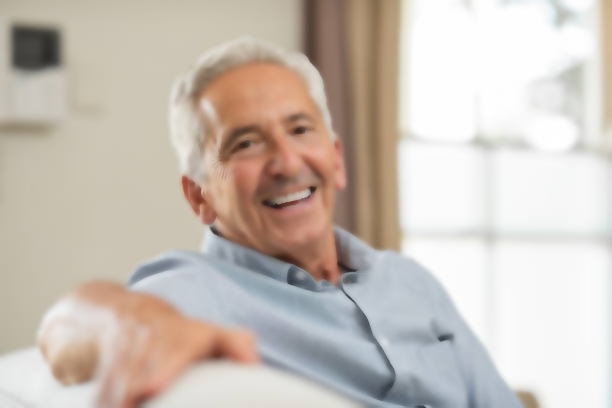

In [49]:
bilateral_filter_image = cv2.bilateralFilter(original_image,9,200,200)
cv2_imshow(bilateral_filter_image)

**Overlaying the edge mask ”sketch” onto the bilateral filter ”painting”**

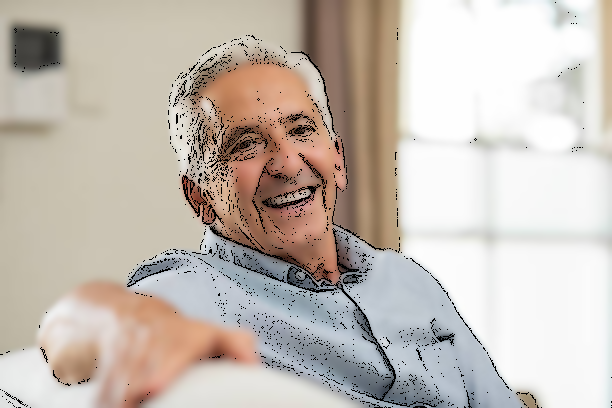

In [50]:
final_image = bilateral_filter_image.copy()

for i in range(0,final_image.shape[0]):
  for j in range(0,final_image.shape[1]):
    if(black_edges_image[i,j] == 0):
      final_image[i,j] = black_edges_image[i,j]

cv2_imshow(final_image)